# 6.Testing of hypothesis using scipy.stats

## a) Test of hypothesis for population mean(known variance)

In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt 

In [11]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [33]:
mu0=50
sigma=4
n=36
alpha =0.05
# 1)Generate random sample
np.random.seed(1)
sample=np.random.normal(mu0,sigma,n)

In [34]:
#2)Sample mean
xbar=np.mean(sample)
print("Sample mean:",xbar)

Sample mean: 49.433014370041775


In [35]:
z=(xbar-mu0)/(sigma/np.sqrt(n))
z


-0.8504784449373375

In [36]:
alpha = 0.05
z_crit =ss.norm.ppf(1-alpha/2)

if abs(z) > z_crit:
    print('Reject H0')
else:
    print('Fail to reject H0')
    
print("Critical values:",-z_crit,z_crit)


Fail to reject H0
Critical values: -1.959963984540054 1.959963984540054


In [37]:
p_value = 2*(1-ss.norm.cdf(abs(z)))
p_value

0.39505913941373505

In [38]:
ci_lower = xbar - z_crit *sigma / np.sqrt(n)
ci_upper = xbar + z_crit *sigma / np.sqrt(n)
print(f"{100*(1-alpha)}%CI:{(ci_lower,ci_upper)}")


95.0%CI:(48.12637171368174, 50.73965702640181)


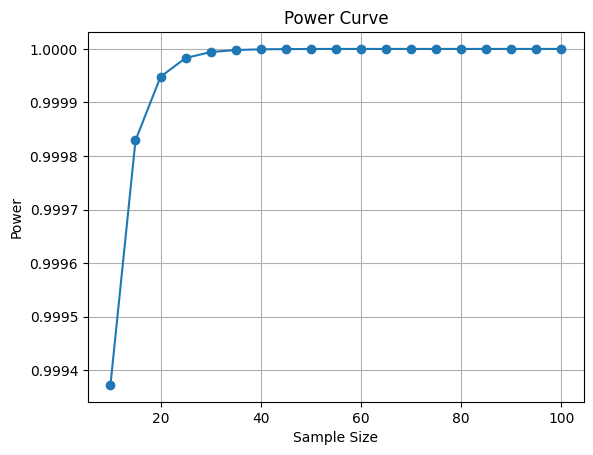

In [50]:
mu_true =48
sample_sizes = np.arange(10,101,5)
powers=[]

for n in sample_sizes:
    z_alpha = ss.norm.ppf(alpha)
    beta = ss.norm.cdf(
       z_alpha + (mu_true - mu0)/(sigma/np.sqrt(n))
    )
    powers.append(1-beta)

plt.plot(sample_sizes,powers,marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Curve')
plt.grid(True)
plt.show()

# b) One-Sided Test

$H_0:\mu = 50$ vs $H_1: \mu < 50$

In [57]:
z_alpha = ss.norm.ppf(alpha)

if z < z_alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')
    

Fail to reject H0


In [58]:
mu_true = 48

beta = ss.norm.cdf(
    z_alpha - (mu_true -mu0)/(sigma/np.sqrt(n))
)
beta

0.9996033849954737

In [59]:
power = 1 -beta
power

0.0003966150045262573

In [52]:
z_one = (xbar - mu0)/(sigma /np.sqrt(n))
z_one
z_crit_one =ss.norm.ppf(alpha)
z_crit_one

p_value_one = ss.norm.cdf(z_one)
p_value_one



0.0781736452986084

# 3. Mean Test (Unknown Variance)

In [60]:
np.random.seed(2)
n = 15 
mu0= 100

x = np.random.normal(mu0,5,n)
xbar4 = np.mean(x)
s = np.std(x,ddof=1)
(xbar,5)

(49.433014370041775, 5)

In [61]:
t_stat = (xbar - mu0)/(s/np.sqrt(n))
t_stat

-31.879284838268546

In [70]:
t_crit = ss.t.ppf(1-alpha/2,df=n-1)
p_value = 2 * (1-ss.t.cdf(abs(t_stat),df=n-1))
(t_crit,p_value)

(1.971956544249395, 0.0)

In [71]:
ci_lower = xbar - t_crit *s / np.sqrt(n)
ci_upper = xbar + t_crit *s / np.sqrt(n)
(ci_lower,ci_upper)

(48.576397807236035, 50.289630932847516)

# 4. Test for Population Proportion

In [67]:
np.random.seed(3)
n=200
p0=0.5

x = np.random.binomial(1,p0,n)
phat = np.mean(x)
phat

0.485

In [72]:
z = (phat - p0) / np.sqrt(p0*(1-p0)/n)
p_value = 2* (1- ss.norm.cdf(abs(z)))
p_value

0.6713732405408723

In [66]:
z_crit = ss.norm.ppf(1-alpha/2)
ci_lower = phat - z_crit * np.sqrt(phat*(1-phat)/n)
ci_lower = phat + z_crit * np.sqrt(phat*(1-phat)/n)
(ci_lower,ci_upper)

(0.5542640013621388, 50.73965702640181)